In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/csv/title_genres.csv", delimiter=",")

In [23]:
genres = df.columns

In [25]:
genres = genres[1:]
genres

Index(['action', 'drama', 'fantasy', 'mystery', 'action drama', 'adventure',
       'excessive violence', 'horror', 'psychological drama',
       'supernatural drama', 'military', 'shounen', 'super power',
       'psychological', 'supernatural', 'thriller', 'crime fiction', 'police',
       'suspense', 'comedy', 'action comedy', 'fighting-shounen', 'ganbatte',
       'school', 'demons', 'historical', 'sci-fi', 'science-fiction', 'parody',
       'romance', 'game', 'seinen', 'ghost stories', 'martial arts',
       'slice of life', 'sentimental drama', 'music', 'sports', 'ecchi',
       'romantic comedy', 'harem', 'mecha', 'vampire', 'gourmet',
       'avant garde', 'samurai', 'shoujo', 'mahou shoujo', 'magical girl',
       'nonsense-comedy', 'slice of life drama', 'boys love', 'romantic drama',
       'dementia', 'eroticism', 'girls love', 'kids', 'indefinite', 'josei',
       'space', 'cars', 'cooking', 'racing', 'crime', 'mature', 'medical',
       'gore', 'gender bender', 'hentai', 

In [4]:
df2 = pd.read_csv("data/csv/title_single_valued_attrs.csv", delimiter=',')

d:\ComputerScience\BachKhoa\IntroDataScience\Anime-Analysis\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
result = pd.concat([df, df2], axis=1)

In [6]:
result = result.loc[:,~result.columns.duplicated()]

In [7]:
result.head(5)

,title,action,drama,fantasy,mystery,action drama,adventure,excessive violence,horror,psychological drama,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1,1,1,1,1,1,1,1,1,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,0,1,1,1,0,0,0,1,1,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,1,1,1,0,0,1,0,0,0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,1,1,1,0,1,1,1,1,0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,1,0,1,0,0,1,0,0,0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [8]:
len(result)

30586

In [9]:
magical_girl = result[(result["magical girl"] == 1) & (result["mahou shoujo"] == 0)]

In [10]:
len(magical_girl)

327

## Magical girl anime

In [11]:
magical_girl[["title", "magical girl", "mahou shoujo"]]

,title,magical girl,mahou shoujo
373,is this a zombie,1,0
776,revolutionary girl utena,1,0
866,ghost stories,1,0
1196,strike witches,1,0
1623,negima,1,0
...,...,...,...
22912,yes precure 5 go go,1,0
23002,yuki yuna is a hero a sunny place,1,0
23003,yuki yuna is a hero,1,0
23019,yuki yuna is a hero hero chapter,1,0


In [12]:
mahou_shoujo = result[(result["magical girl"] == 0) & (result["mahou shoujo"] == 1)]

In [13]:
len(mahou_shoujo)

219

In [14]:
mahou_shoujo[["title", "magical girl", "mahou shoujo"]]

,title,magical girl,mahou shoujo
444,puella magi madoka magica the movie part iii r...,0,1
528,cardcaptor sakura,0,1
656,fatekaleid liner prisma☆illya,0,1
737,azumanga daioh,0,1
941,puella magi madoka magica the movie part i beg...,0,1
...,...,...,...
14097,mahou no tenshi creamy mami no otogibanashi,0,1
14341,ak mofa shaonü,0,1
14355,balala xiao moxian mofa hai ying bao 2,0,1
14445,xiao hua xian 5 sishi hua yu chun xia 2 xia,0,1


In [15]:
result.iloc[444]

title                puella magi madoka magica the movie part iii r...
action                                                               0
drama                                                                1
fantasy                                                              1
mystery                                                              1
                                           ...                        
user_count_kitsu                                                   NaN
mean_score_mal                                                     NaN
popularity_mal                                                     NaN
number_scorer_mal                                                  NaN
favorites_mal                                                      NaN
Name: 444, Length: 137, dtype: object

## Box plot & Violin plot

### Action anime

In [16]:
action_anime = result[result["action"] == 1]

In [17]:
len(action_anime)

8326

In [18]:
action_anime.head()

,title,action,drama,fantasy,mystery,action drama,adventure,excessive violence,horror,psychological drama,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1,1,1,1,1,1,1,1,1,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
2,my hero academia,1,1,1,0,0,1,0,0,0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,1,1,1,0,1,1,1,1,0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,1,0,1,0,0,1,0,0,0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0
5,onepunch man,1,0,1,0,0,0,0,0,0,...,"https://www.anisearch.com/anime/10317,one-punc...",r,8.35,3384.0,26.0,341696.0,8.52,2554288.0,1756696.0,53626.0


In [19]:
action_anime["mean_score_anilist"] = action_anime["mean_score_anilist"].apply(lambda x: x*10)

d:\ComputerScience\BachKhoa\IntroDataScience\Anime-Analysis\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

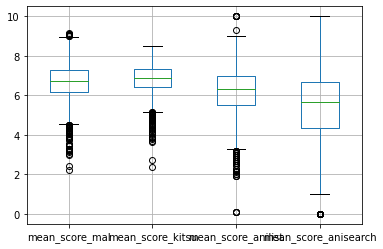

In [20]:
action_anime.boxplot(column=["mean_score_mal", "mean_score_kitsu", "mean_score_anilist", "mean_score_anisearch"])

<AxesSubplot:ylabel='mean_score_anilist'>

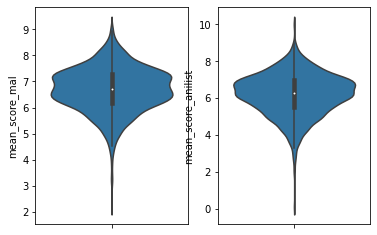

In [21]:
fig, axs = plt.subplots(ncols=2)
sns.violinplot(y=action_anime["mean_score_mal"], ax=axs[0], orient="v")
sns.violinplot(y=action_anime["mean_score_anilist"], ax=axs[1], orient="v")

In [22]:
action_anime = result[result["drama"] == 1]

### All genres

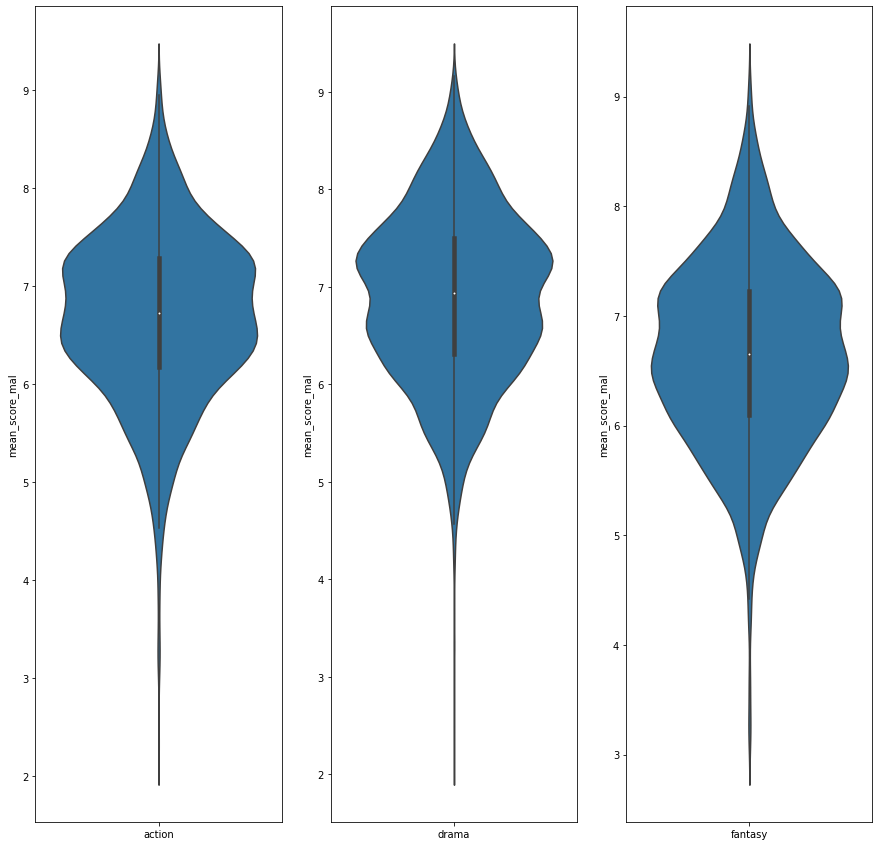

In [35]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 15))
for idx, genre in enumerate(genres[:3]):
    anime = result[result[genre] == 1]
    ax = sns.violinplot(y=anime["mean_score_mal"], ax=axs[idx])
    ax.set_xticklabels([genre])